In [53]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
%matplotlib inline

In [40]:
myframe = pd.read_excel("consumo.xlsx")

In [41]:
mf = myframe.drop("fecha", axis = 1)

In [51]:
mf.head()

,mín,max,prom,Nubosidad,Lluvia,Velocidad viento
0,8.857143,24.571429,16.714286,23.853679,0.001,23.25
1,8.500000,24.642857,16.571429,22.364404,0.001,23.25
2,9.142857,24.285714,16.714286,19.124190,0.001,22.75
3,9.714286,24.500000,17.107143,19.215350,0.001,22.75
4,11.000000,25.285714,18.142857,26.441329,0.001,22.75


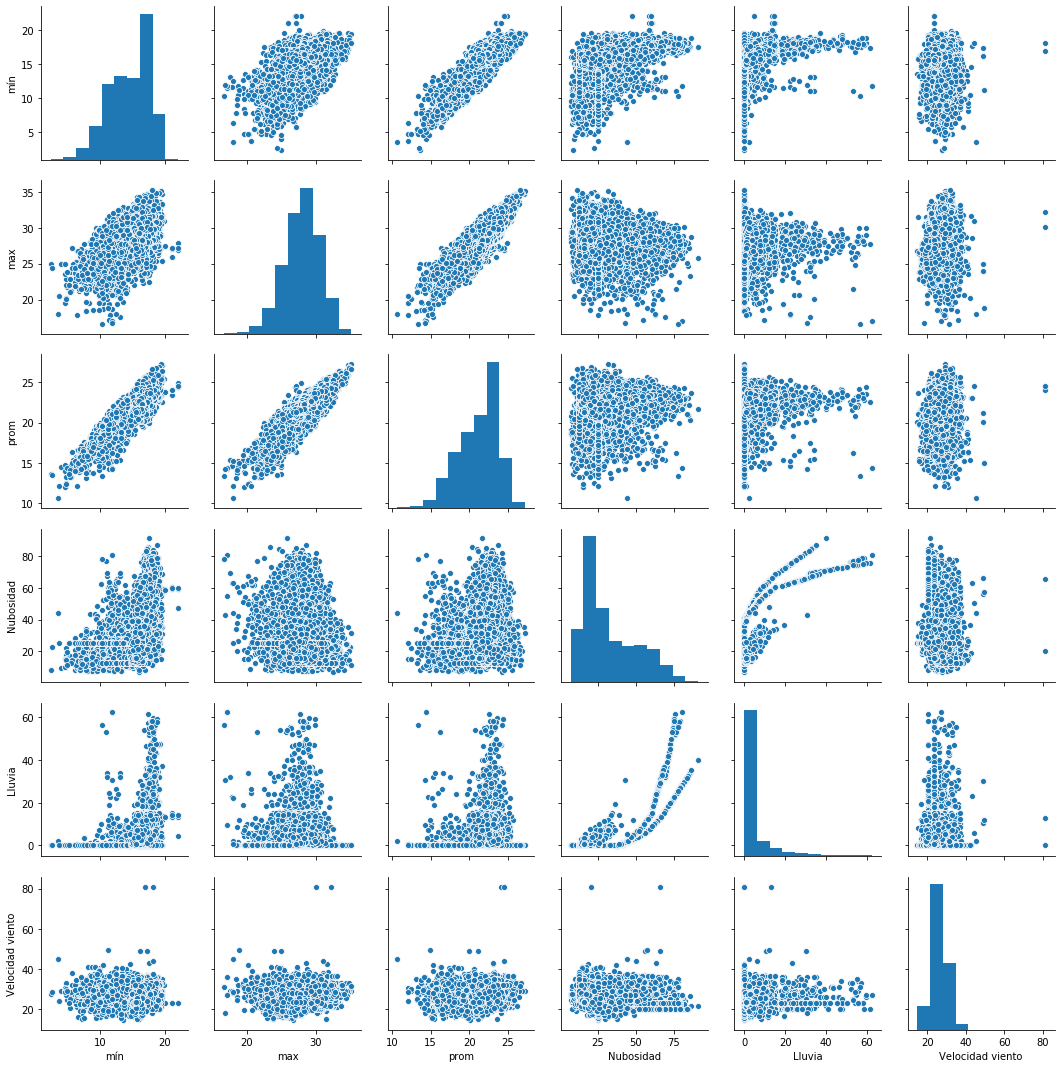

In [44]:
sn.pairplot(data=mf);

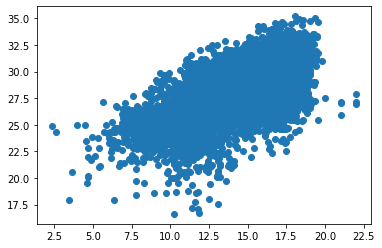

In [50]:
plt.scatter(mf.iloc[:,0], mf.iloc[:,1])

In [69]:
inercias = [KMeans(n_clusters=k,random_state=5,init="random", n_jobs = -1).fit(mf).inertia_ for k in np.arange(1, 10)]

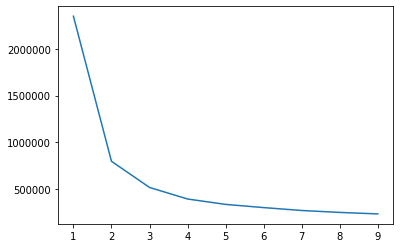

In [72]:
plt.plot(np.arange(1, len(inercias)+1), inercias);

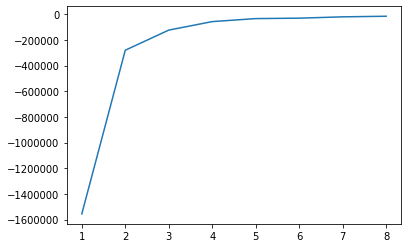

In [73]:
plt.plot(np.arange(1, len(inercias)),np.diff(inercias));

### Regresion con 2

In [84]:
model = KMeans(n_clusters=2,random_state=5,init="k-means++").fit(mf)
groups = model.predict(mf)
centroides = model.cluster_centers_

In [88]:
groups

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
centroides

array([[13.40048322, 27.96706396, 20.68377359, 22.60193905,  0.20009997,
        26.79853761],
       [17.20389544, 28.0225993 , 22.61324737, 56.85922748, 11.95417339,
        25.82407963]])

In [81]:
centroides.shape

(2, 6)

In [90]:
mf2 = mf.copy()
mf2["grupo"] = groups

In [92]:
mf2.query('grupo == 0')

,mín,max,prom,Nubosidad,Lluvia,Velocidad viento,grupo
0,8.857143,24.571429,16.714286,23.853679,0.001000,23.250000,0
1,8.500000,24.642857,16.571429,22.364404,0.001000,23.250000,0
2,9.142857,24.285714,16.714286,19.124190,0.001000,22.750000,0
3,9.714286,24.500000,17.107143,19.215350,0.001000,22.750000,0
4,11.000000,25.285714,18.142857,26.441329,0.001000,22.750000,0
...,...,...,...,...,...,...,...
5738,15.148289,28.249427,21.698858,15.999937,3.516833,23.547723,0
5739,15.747076,27.634117,21.690597,26.558520,7.439257,25.634125,0
5741,15.874777,26.692100,21.283439,21.342801,4.161928,23.887796,0
5742,15.354352,27.659577,21.506965,15.932895,1.265046,23.815369,0
